In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

## ***In an undirected graph, if it is connected, there will be a path between every pair of node***

### ***A connected component is a subset of nodes where every node in the subset has a path to every other node in the subset and no other node outside this subset has a path to any node in the subset. (a secular subset of nodes)***

In [31]:
def generate_unique_pairs(container: list[str], ignore: list[tuple] = None) -> list[str]:
    if ignore == None:
        ignore = list()
    upairs = list()
    for (a, b) in itertools.permutations(container, 2):
        if ((b, a) not in upairs) & ((a, b) not in ignore) & ((b, a) not in ignore):
            upairs.append((a, b))
    return upairs

In [32]:
generate_unique_pairs(["A", "B", "C", "D", "E"], [("A", "D")])

[('A', 'B'),
 ('A', 'C'),
 ('A', 'E'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'D'),
 ('C', 'E'),
 ('D', 'E')]

In [33]:
generate_unique_pairs(["F", "G", "H", "I", "J"], [("H", "F"), ("J", "F")])

[('F', 'G'),
 ('F', 'I'),
 ('G', 'H'),
 ('G', 'I'),
 ('G', 'J'),
 ('H', 'I'),
 ('H', 'J'),
 ('I', 'J')]

In [34]:
generate_unique_pairs(["K", "L", "M", "N", "O"], [("M", "N"), ("N", "K")])

[('K', 'L'),
 ('K', 'M'),
 ('K', 'O'),
 ('L', 'M'),
 ('L', 'N'),
 ('L', 'O'),
 ('M', 'O'),
 ('N', 'O')]

In [36]:
edges = generate_unique_pairs(["A", "B", "C", "D", "E"], [("A", "D")]) + \
        generate_unique_pairs(["F", "G", "H", "I", "J"], [("H", "F"), ("J", "F")]) + \
        generate_unique_pairs(["K", "L", "M", "N", "O"], [("M", "N"), ("N", "K")])

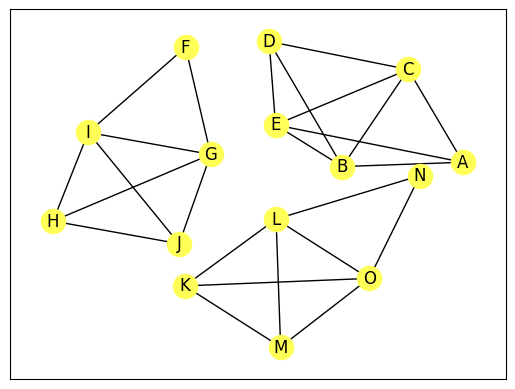

In [86]:
graph = nx.Graph()
graph.add_edges_from(edges)
pos = nx.kamada_kawai_layout(graph, scale = 10)
nx.draw_networkx(graph, node_color = "#FFFF57", pos = pos)

In [87]:
# is {A, E, F , G} a connected component? No.A and E cannot reach F or G
# {N, O, K} a connected componeent? No. N, O & K can reach one another but they can also be accessed by other nodes!

In [88]:
# number of connected components

nx.number_connected_components(graph)

3

In [91]:
# connected components in a network

list(nx.connected_components(graph))

[{'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'H', 'I', 'J'},
 {'K', 'L', 'M', 'N', 'O'}]

In [94]:
# to learn which connecetd component a node belongs to

nx.node_connected_component(graph, "A")

{'A', 'B', 'C', 'D', 'E'}